In [1]:
# Import numpy and matplotlib and get plots directly in notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Convolutional neural network

This notebook contains a fairly minimal example of setting up a convolutional neural network for recognizing handwritten digits. It uses the library Keras, which in turn uses TensorFlow as a backend. The dataset is a publicly available set of 60000 images (each image is 28x28 pixels) of handwritten digits, and a set of matching labels which gives the correct digit in each image.

This isn't meant as a comprehensive example of best practice or anything like that, but more as a simple example to show that it is quite easy to get started (if you have an easily available set of input data).

If you are interested in learning more about neural networks, there are numerous tutorials, books, videos, etc. available on the web. It's a field that changes fast, and hence there is a lot of new content appearing quite frequently.

One set of videos that I found quite useful for explaining the basics of neural networks are these. They do not focus on the most up-to-date practice, but rather on the fundamentals, and how it's all really linear algebra.
* https://www.youtube.com/watch?v=aircAruvnKk
* https://www.youtube.com/watch?v=IHZwWFHWa-w
* https://www.youtube.com/watch?v=Ilg3gGewQ5U
* https://www.youtube.com/watch?v=tIeHLnjs5U8

See also this free online book, which has lots of details and examples in Python. Chapter 6 deals with convolutional neural networks, which has become extremely popular for things like image recognition.
* http://neuralnetworksanddeeplearning.com/index.html

In [2]:
# Import Keras for setting up neural network
# This requires that you have Keras and a backend (such as tensorflow) installed,
# and this seems to require python 3.6.* or _less_
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
# Path to store a local copy when downloding data
# (this path is relative to ~/.keras/datasets/)
local_copy = 'mnist.npz'
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data(path=local_copy)

# Reshape image so that each of the 60000 images have shape (28,28,1)
# and rescale so that pixel values are in the range [0, 1] instead of [0, 255]
train_images = train_images.reshape((*train_images.shape, 1)) / 255
test_images  = test_images.reshape( ( *test_images.shape, 1)) / 255

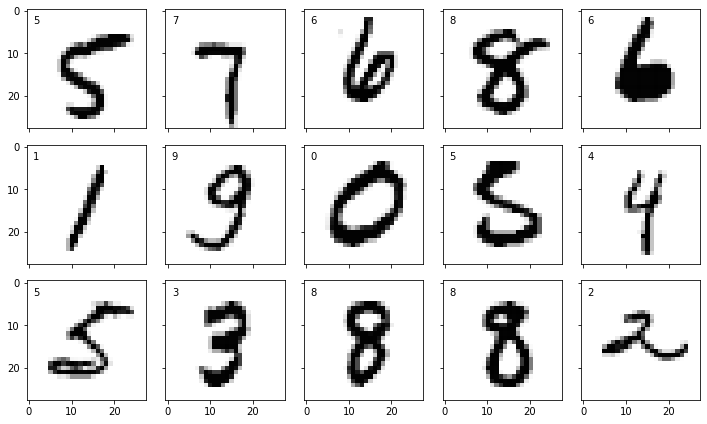

In [4]:
# Check that the data makes sense by plotting an image
# and printing the associated label
fig, ax = plt.subplots(ncols = 5, nrows = 3, figsize = (10,6), sharex = True, sharey = True)
inds = np.random.choice(np.arange(len(train_images)), size = 15)
for n,i in enumerate(inds):
    ax.flatten()[n].imshow(train_images[i,:,:,0], cmap = plt.cm.Greys)
    ax.flatten()[n].text(1,3,train_labels[i])

plt.tight_layout()

In [5]:
# Construct a model by adding layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# train the model
history = model.fit(train_images, train_labels, epochs=3, batch_size=32, verbose=1)

Epoch 1/3
60000/60000 [==============================] - 20s 328us/step - loss: 0.1651 - accuracy: 0.9498
Epoch 2/3
60000/60000 [==============================] - 20s 334us/step - loss: 0.0561 - accuracy: 0.9832
Epoch 3/3
60000/60000 [==============================] - 21s 348us/step - loss: 0.0354 - accuracy: 0.9895


In [7]:
# evaluate model
_, accuracy = model.evaluate(test_images, test_labels, verbose=1)

print(f'Accuracy on test data: {accuracy}')

10000/10000 [==============================] - 1s 109us/step
Accuracy on test data: 0.9871000051498413


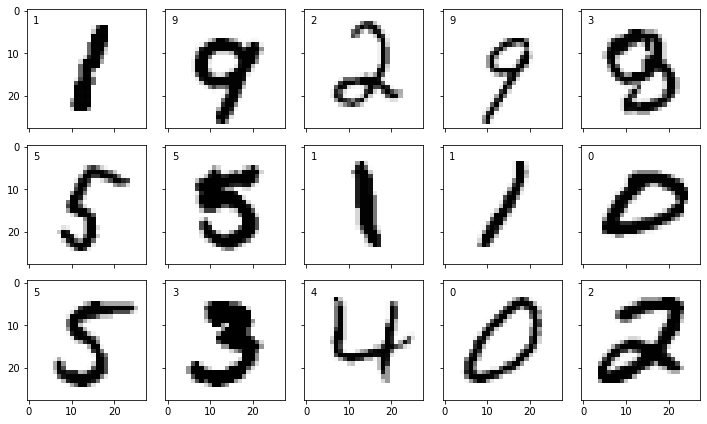

In [8]:
# Check that the data makes sense by plotting an image
# and printing the associated label
fig, ax = plt.subplots(ncols = 5, nrows = 3, figsize = (10,6), sharex = True, sharey = True)
inds = np.random.choice(np.arange(len(train_images)), size = 15)
for n,i in enumerate(inds):
    ax.flatten()[n].imshow(train_images[i,:,:,0], cmap = plt.cm.Greys)
    # model.predict returns a 10-element array, where the largest
    # element is the most probable digit
    prediction = np.argmax( model.predict(train_images[i,:][None,:,:,:]) )
    ax.flatten()[n].text(1, 3, prediction)

plt.tight_layout()

## So how does this actually work?

The idea of a convolutional neural network is to create small arrays called filters or kernels (and possibly other names), that extract different features from the image. To achieve this, the convolution of the filter and the image is calculated.

Below, we look at at two different idealised filters, designed to extract vertical and horizontal features.

In [9]:
from scipy.signal import convolve2d

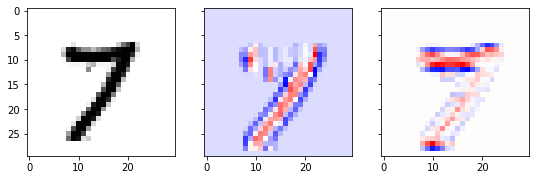

In [10]:
vertical_pattern = np.array([
    [-1,2,-1],
    [-1,2,-1],
    [-1,2,-1],
])

horizontal_pattern = np.array([
    [-1,-1,-1],
    [ 2, 2, 2],
    [-1,-1,-1],
])

i = 58
#i = np.random.randint(0, 60000-1)
image = train_images[i,:,:,0]

fig, ax = plt.subplots(ncols = 3, figsize = (9,3), sharex = True, sharey = True)

ax[0].imshow(image, cmap = plt.cm.Greys)
ax[1].imshow(convolve2d(vertical_pattern, image), cmap = plt.cm.bwr)
ax[2].imshow(convolve2d(horizontal_pattern, image), cmap = plt.cm.bwr)

### Looking at the actual trained filters

From the `model` object, we can extract the trained filters that were found to work best for classifying the digits. There are 32 different 3x3 filters, as specified above when we added the layer `Conv2D(32, (3, 3), ...)`.

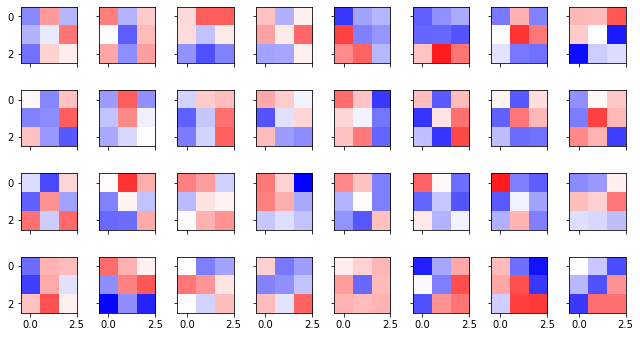

In [11]:
fig, ax = plt.subplots(ncols = 8, nrows = 4, figsize = (9,5), sharex = True, sharey = True)

vmax = np.amax(np.abs(model.get_weights()[0]))
for i in range(32):
    ax.flatten()[i].imshow(model.get_weights()[0][:,:,0,i], vmin = -vmax, vmax = vmax, cmap = plt.cm.bwr)
    
plt.tight_layout()